# Image Classification


In this project, you'll classify images from the CIFAR-10 dataset. The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded. You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers. At the end, you'll get to see your neural network's predictions on the sample images.

Get the Data: Run the following cell to download the CIFAR-10 dataset for python.

Data: CIFAR-10 is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

Explore the Data: The dataset is broken into batches to prevent your machine from running out of memory. The CIFAR-10 dataset consists of 5 batches, named data_batch_1, data_batch_2, etc.. Each batch contains the labels and images that are one of the following:

CIFAR-10 Task – Object Recognition in Images CIFAR-10 is an established computer-vision dataset used for object recognition. The CIFAR-10 data consists of 60,000 (32×32) color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. The label classes in the dataset are:

airplane automobile bird cat deer dog frog horse ship truck The classes are completely mutually exclusive. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. Let us visualize few of the images of test

In [1]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()

CIFAR-10 Dataset: 171MB [02:56, 1.31MB/s]                                                                              


In [2]:
cifar10_dataset_folder_path

'cifar-10-batches-py'

In [3]:
import pickle
import matplotlib.pyplot as plt

LABEL_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
import pickle
import matplotlib.pyplot as plt

LABEL_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def load_cfar10_batch(batch_id):
    """
    Load a batch of the dataset
    """
    with open(cifar10_dataset_folder_path + '/data_batch_' 
              + str(batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']

    return features, labels

In [5]:
def display_stats(features, labels, sample_id):
    """
    Display Stats of the the dataset
    """

    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'
              .format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch {}:'.format(batch_id))
    print('Samples: {}'.format(len(features)))
    print('Label Counts: {}'.format(dict(zip(*np.unique(labels, return_counts=True)))))
    print('First 20 Labels: {}'.format(labels[:20]))

    sample_image = features[sample_id]
    sample_label = labels[sample_id]

    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, LABEL_NAMES[sample_label]))
    plt.axis('off')
    plt.imshow(sample_image)
    plt.show()


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 0:
Image - Min Value: 0 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 6 Name: frog


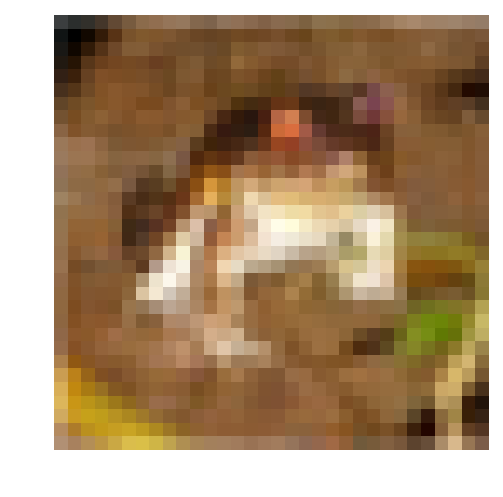


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 1:
Image - Min Value: 5 Max Value: 254
Image - Shape: (32, 32, 3)
Label - Label Id: 9 Name: truck


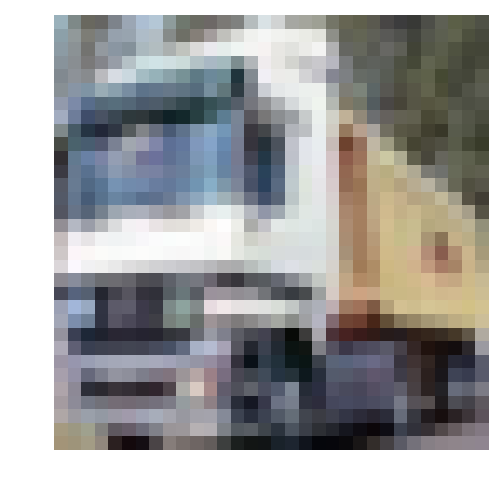


Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 0:
Image - Min Value: 5 Max Value: 225
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


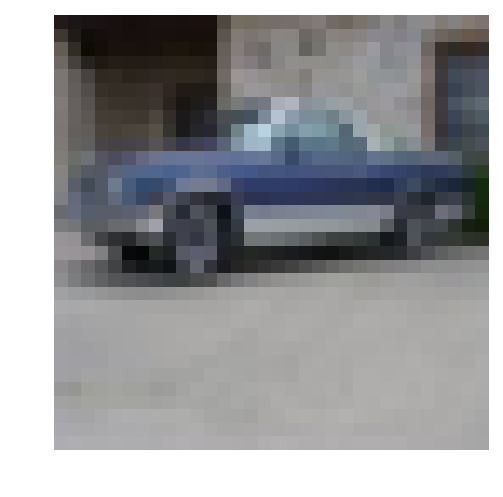


Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 1:
Image - Min Value: 2 Max Value: 247
Image - Shape: (32, 32, 3)
Label - Label Id: 6 Name: frog


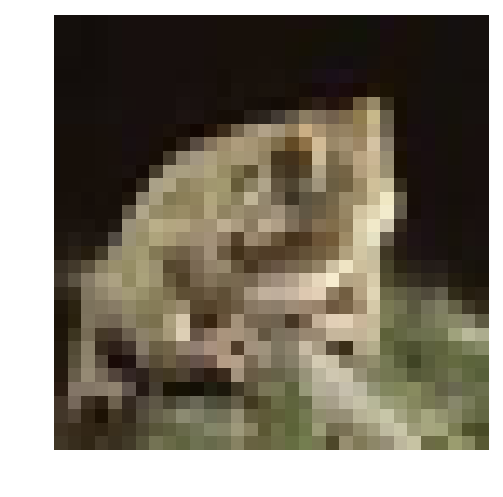


Stats of batch 3:
Samples: 10000
Label Counts: {0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
First 20 Labels: [8, 5, 0, 6, 9, 2, 8, 3, 6, 2, 7, 4, 6, 9, 0, 0, 7, 3, 7, 2]

Example of Image 0:
Image - Min Value: 0 Max Value: 254
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


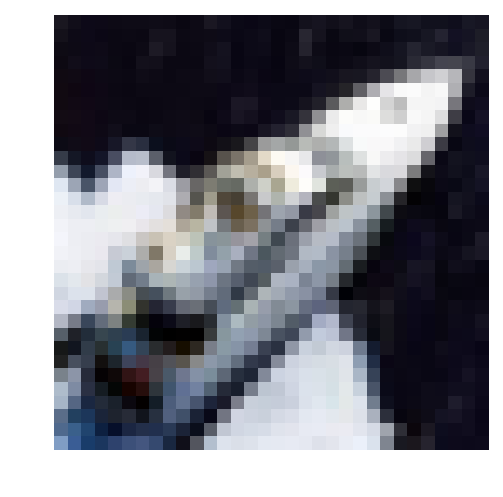


Stats of batch 3:
Samples: 10000
Label Counts: {0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
First 20 Labels: [8, 5, 0, 6, 9, 2, 8, 3, 6, 2, 7, 4, 6, 9, 0, 0, 7, 3, 7, 2]

Example of Image 1:
Image - Min Value: 15 Max Value: 249
Image - Shape: (32, 32, 3)
Label - Label Id: 5 Name: dog


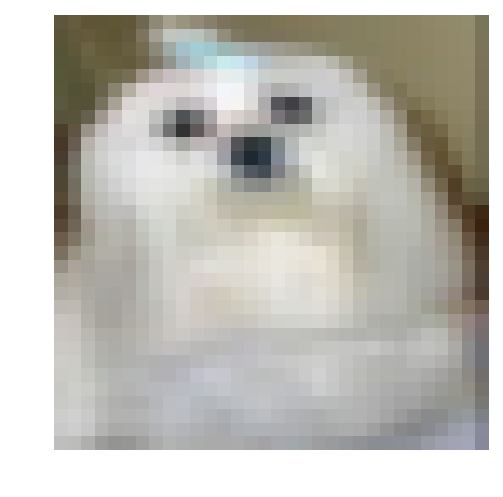


Stats of batch 4:
Samples: 10000
Label Counts: {0: 1003, 1: 963, 2: 1041, 3: 976, 4: 1004, 5: 1021, 6: 1004, 7: 981, 8: 1024, 9: 983}
First 20 Labels: [0, 6, 0, 2, 7, 2, 1, 2, 4, 1, 5, 6, 6, 3, 1, 3, 5, 5, 8, 1]

Example of Image 0:
Image - Min Value: 34 Max Value: 203
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


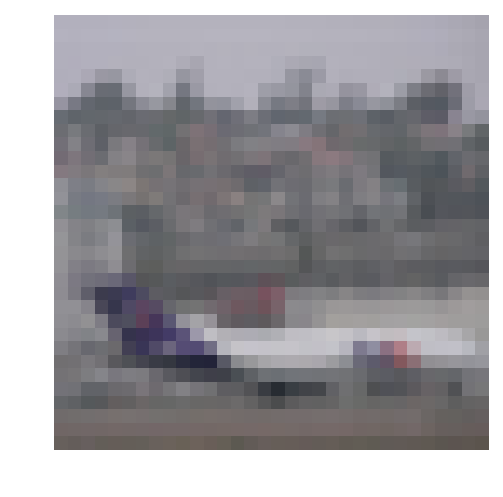


Stats of batch 4:
Samples: 10000
Label Counts: {0: 1003, 1: 963, 2: 1041, 3: 976, 4: 1004, 5: 1021, 6: 1004, 7: 981, 8: 1024, 9: 983}
First 20 Labels: [0, 6, 0, 2, 7, 2, 1, 2, 4, 1, 5, 6, 6, 3, 1, 3, 5, 5, 8, 1]

Example of Image 1:
Image - Min Value: 0 Max Value: 246
Image - Shape: (32, 32, 3)
Label - Label Id: 6 Name: frog


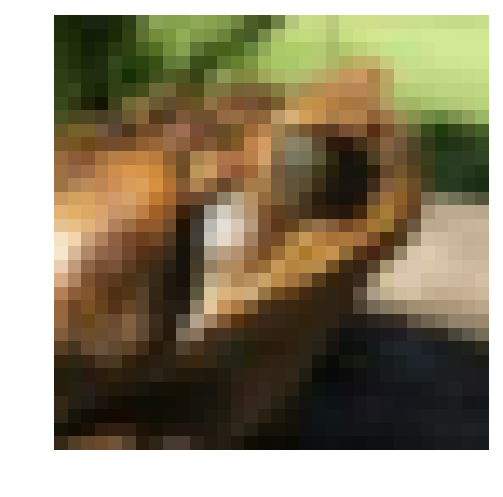


Stats of batch 5:
Samples: 10000
Label Counts: {0: 1014, 1: 1014, 2: 952, 3: 1016, 4: 997, 5: 1025, 6: 980, 7: 977, 8: 1003, 9: 1022}
First 20 Labels: [1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8]

Example of Image 0:
Image - Min Value: 2 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


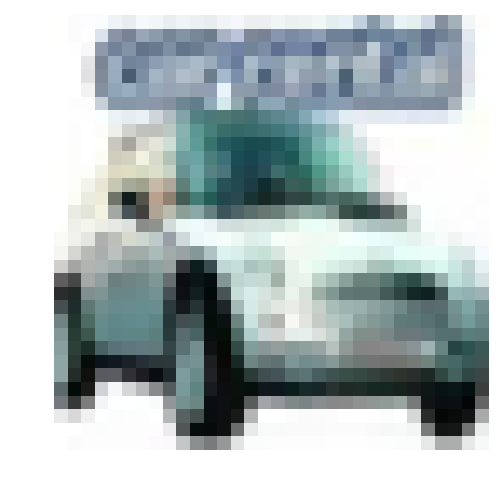


Stats of batch 5:
Samples: 10000
Label Counts: {0: 1014, 1: 1014, 2: 952, 3: 1016, 4: 997, 5: 1025, 6: 980, 7: 977, 8: 1003, 9: 1022}
First 20 Labels: [1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8]

Example of Image 1:
Image - Min Value: 1 Max Value: 244
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


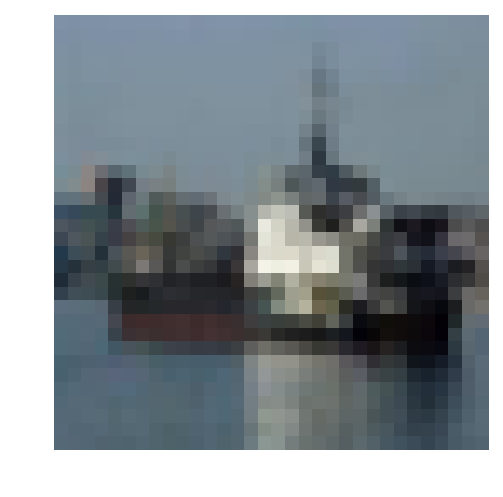

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

for batch_id in range(1,6):
    features, labels = load_cfar10_batch(batch_id)
    for image_id in range(0,2):
        display_stats(features, labels, image_id)

del features, labels # free memory

# Preprocess data

# Normalization function

In the cell below, the normalize function takes in image data, x, and return it as a normalized Numpy array. The values are in the range of 0 to 1, inclusive. The returned object has the same shape as x

In [7]:
def normalize(x):
    # Each pixel has three channels - Red, Green and Blue. 
    # Each channel is an int between 0 and 255 (8-bit color scheme). 
    return np.array(x) / 255.0

# One-hot-encoding

Not only the input data, but also the labels have to be preprocessed. When dealing with categorical data one has to one-hot-encode the labels. Normally, I would use the OneHotEncoder from the sklearn.preprocessing library. For the sake of example, I implemented it by myself.

In [8]:
def one_hot_encode(x):
    one_hot_encoded = np.zeros((len(x), 10))
    for i in range(len(x)):
        one_hot_encoded[i][x[i]] = 1.0
    return one_hot_encoded

# Preprocess all the data and save it

Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation. Remember, we do not want to load all the data in the memory simultaneously

In [9]:
"""
Preprocess Training and Validation and Test Data
"""

def preprocess_and_save(features, labels, filename):
    """
    Preprocess data and save it to file
    Both functions have been defined above
    """
    features = normalize(features) 
    labels = one_hot_encode(labels)

    pickle.dump((features, labels), open(filename, 'wb'))

def preprocess_and_save_all_data():
    """
    Preprocess Training and Validation Data
    """
    n_batches = 5
    valid_features = []
    valid_labels = []

    for batch_i in range(1, n_batches + 1):
        features, labels = load_cfar10_batch(batch_i)
        validation_count = int(len(features) * 0.1)

        # Process and save a batch of training data
        preprocess_and_save(
            features[:-validation_count],
            labels[:-validation_count],
            'preprocess_batch_' + str(batch_i) + '.p')

        # Use a portion of training batch for validation
        valid_features.extend(features[-validation_count:])
        valid_labels.extend(labels[-validation_count:])

    # Preprocess and Save all validation data
    preprocess_and_save(
        np.array(valid_features),
        np.array(valid_labels),
        'preprocess_validation.p')

    with open(cifar10_dataset_folder_path + '/test_batch', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    # load the training data
    test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    test_labels = batch['labels']

    # Preprocess and Save all training data
    preprocess_and_save(
        np.array(test_features),
        np.array(test_labels),
        'preprocess_training.p')

# Run preprocessing and saving on disk
preprocess_and_save_all_data()

# Building the neural network

For the neural network, I will build each type of layer into a function. Encapsulating tensorflow logic in such functions allows you to easily modify the architecture without having to rewrite the boilerplate tensorflow code. Furthermore, the functions built can be later reused for other datasets containing images with different size and different labels.

In [10]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    return tf.placeholder(tf.float32, shape=(None, image_shape[0], image_shape[1], image_shape[2]), name='x')

def neural_net_label_input(n_classes):
    return tf.placeholder(tf.float32, shape=(None, n_classes), name='y')

def neural_net_keep_prob_input():
    return tf.placeholder(tf.float32, name='keep_prob')

# Convolution and Max Pooling Layer

Convolution layers have a lot of success with images. The following block of code implements the function conv2d_maxpool to apply convolution and then max pooling. Applying convolutions and then max pooling has become a “de facto” standard for constructing neural networks for image recognition. It is generally a nice idea to log the layer’s input and output dimensions - the two print functions at the end will be useful when fine tuning the network architecture.

In [11]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
   
    # Create filter dimensions
    filter_height, filter_width, in_channels, out_channels = \
        conv_ksize[0], conv_ksize[1],  x_tensor.get_shape().as_list()[3], conv_num_outputs
    conv_filter = [filter_height, filter_width, in_channels, out_channels]
    
    # Create weights and bias
    weights = tf.Variable(tf.truncated_normal(conv_filter, stddev=0.05))
    bias = tf.Variable(tf.truncated_normal([conv_num_outputs], stddev=0.05))

In [12]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
   
    # Create filter dimensions
    filter_height, filter_width, in_channels, out_channels = \
        conv_ksize[0], conv_ksize[1],  x_tensor.get_shape().as_list()[3], conv_num_outputs
    conv_filter = [filter_height, filter_width, in_channels, out_channels]
    
    # Create weights and bias
    weights = tf.Variable(tf.truncated_normal(conv_filter, stddev=0.05))
    bias = tf.Variable(tf.truncated_normal([conv_num_outputs], stddev=0.05))
    
    # Create strides
    strides=(1,conv_strides[0], conv_strides[1], 1)
    
    # Bind all together to create the layer
    conv = tf.nn.conv2d(x_tensor, weights, strides, padding='SAME')
    conv = tf.nn.bias_add(conv, bias)
    
    # Create ksize 
    ksize = (1, pool_ksize[0], pool_ksize[1], 1)
    
    # Create strides
    strides=(1,pool_strides[0], pool_strides[1], 1)
    
    pool = tf.nn.max_pool(conv, ksize, strides, padding='SAME')
    
    print('Convolutional layer with conv_num_outputs:',conv_num_outputs,
          'conv_ksize:', conv_ksize,
          'conv_strides:', conv_strides,
          'pool_ksize:',pool_ksize,
          'pool_strides', pool_strides)
    print('layer input shape', x_tensor.get_shape().as_list(),
          'layer output shape', pool.get_shape().as_list())
    
    return pool

def flatten(x_tensor):
    _, height, width, channels = x_tensor.get_shape().as_list()
    net = tf.reshape(x_tensor, shape=[-1, height * width * channels])
    print('flatten shape', net.get_shape().as_list())
    return net

def fully_conn(x_tensor, num_outputs):
    _, size = x_tensor.get_shape().as_list()
    weights = tf.Variable(tf.truncated_normal([size, num_outputs], stddev=0.05))
    bias = tf.Variable(tf.truncated_normal([num_outputs], stddev=0.05))
    
    fully_connected = tf.add(tf.matmul(x_tensor, weights), bias)
    
    print('layer input shape', x_tensor.get_shape().as_list(),
         'layer output shape', fully_connected.get_shape().as_list())
    
    return fully_connected

# The Neural Network architecture

In [13]:
def conv_net(input_x, keep_probability):
    
    net = conv2d_maxpool(input_x,   32, (7,7), (2,2), (2,2), (2,2))
    net = conv2d_maxpool(net, 64, (3,3), (1,1), (2,2), (2,2))
    net = conv2d_maxpool(net, 128, (2,2), (1,1), (2,2), (2,2))
    
    net = flatten(net)
    net = tf.nn.dropout(net, keep_probability)
    net = fully_conn(net, 1024)
    net = tf.nn.dropout(net, keep_probability)
    net = fully_conn(net, 128)
    net = fully_conn(net, 10)

    return net

In [14]:
##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

IMAGE_SHAPE = (32, 32, 3)
LABELS_COUNT = 10

# Inputs
x = neural_net_image_input(IMAGE_SHAPE)
y = neural_net_label_input(LABELS_COUNT)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

Instructions for updating:
Colocations handled automatically by placer.
Convolutional layer with conv_num_outputs: 32 conv_ksize: (7, 7) conv_strides: (2, 2) pool_ksize: (2, 2) pool_strides (2, 2)
layer input shape [None, 32, 32, 3] layer output shape [None, 8, 8, 32]
Convolutional layer with conv_num_outputs: 64 conv_ksize: (3, 3) conv_strides: (1, 1) pool_ksize: (2, 2) pool_strides (2, 2)
layer input shape [None, 8, 8, 32] layer output shape [None, 4, 4, 64]
Convolutional layer with conv_num_outputs: 128 conv_ksize: (2, 2) conv_strides: (1, 1) pool_ksize: (2, 2) pool_strides (2, 2)
layer input shape [None, 4, 4, 64] layer output shape [None, 2, 2, 128]
flatten shape [None, 512]
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
layer input shape [None, 512] layer output shape [None, 1024]
layer input shape [None, 1024] layer output shape [None, 128]
layer input shape [None, 128] layer output shape [None, 10]
Instructions

# Show stats

In [15]:
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

def print_stats(session, feature_batch, label_batch, cost, accuracy):
    batch_loss = session.run(cost, feed_dict=\
                    {x:feature_batch, y:label_batch, keep_prob:1.0})
    batch_accuracy = session.run(accuracy, feed_dict=\
                    {x:valid_features, y:valid_labels, keep_prob:1.0})
    
    print('batch loss is : ', batch_loss)
    print('batch_accuracy accuracy is :',batch_accuracy)

# Hyperparameters

In [17]:
epochs = 10
batch_size = 128
keep_probability = 0.7
learning_rate = 0.001

In [18]:
# a couple of helper functions for loading a single batch
def batch_features_labels(features, labels, batch_size):
    """
    Split features and labels into batches
    """
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]
        
def load_preprocess_training_batch(batch_id, batch_size):
    """
    Load the Preprocessed Training data and return them in batches of <batch_size> or less
    """
    filename = 'preprocess_batch_' + str(batch_id) + '.p'
    features, labels = pickle.load(open(filename, mode='rb'))

    # Return the training data in batches of size <batch_size> or less
    return batch_features_labels(features, labels, batch_size)

In [19]:
print('Checking the Training on a Single Batch...')
with tf.Session() as session:
    # Initializing the variables
    session.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in \
            load_preprocess_training_batch(batch_i, batch_size):
            session.run(optimizer, feed_dict=\
                        {x:batch_features, y:batch_labels, keep_prob:keep_probability})
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(session, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  batch loss is :  1.8106594
batch_accuracy accuracy is : 0.394
Epoch  2, CIFAR-10 Batch 1:  batch loss is :  1.5745143
batch_accuracy accuracy is : 0.4578
Epoch  3, CIFAR-10 Batch 1:  batch loss is :  1.3547672
batch_accuracy accuracy is : 0.4902
Epoch  4, CIFAR-10 Batch 1:  batch loss is :  1.1925217
batch_accuracy accuracy is : 0.503
Epoch  5, CIFAR-10 Batch 1:  batch loss is :  1.0229713
batch_accuracy accuracy is : 0.5134
Epoch  6, CIFAR-10 Batch 1:  batch loss is :  0.8708186
batch_accuracy accuracy is : 0.5194
Epoch  7, CIFAR-10 Batch 1:  batch loss is :  0.7564031
batch_accuracy accuracy is : 0.5446
Epoch  8, CIFAR-10 Batch 1:  batch loss is :  0.6894399
batch_accuracy accuracy is : 0.5448
Epoch  9, CIFAR-10 Batch 1:  batch loss is :  0.63158756
batch_accuracy accuracy is : 0.5492
Epoch 10, CIFAR-10 Batch 1:  batch loss is :  0.547556
batch_accuracy accuracy is : 0.5546


In [20]:
save_model_path = './image_classification'

print('Training...')
with tf.Session() as session:
    # Initializing the variables
    session.run(tf.global_variables_initializer())
    

     # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in \
                load_preprocess_training_batch(batch_i, batch_size):
                session.run(optimizer, feed_dict=\
                    {x:batch_features, y:batch_labels, keep_prob:keep_probability})
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(session, save_model_path)

Training...


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.6632713607594937



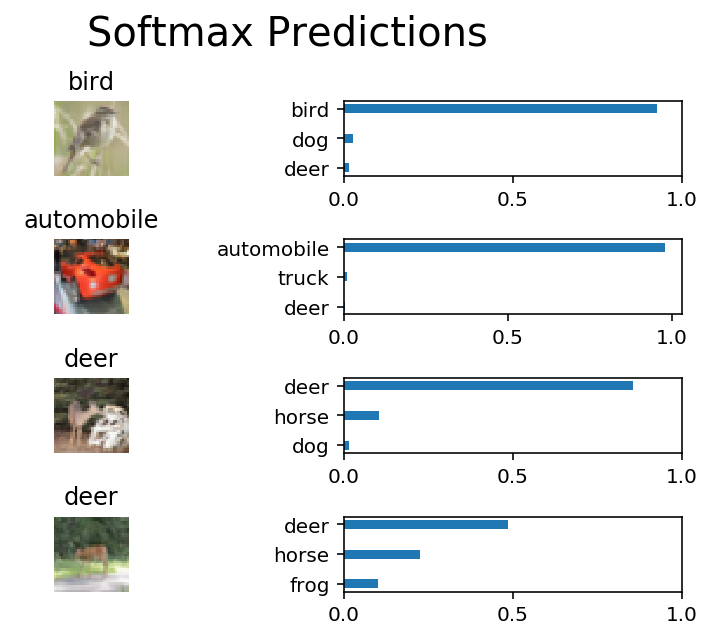

In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

def display_image_predictions(features, labels, predictions):
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(LABELS_COUNT))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axies = plt.subplots(nrows=4, ncols=2)
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    n_predictions = 3
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) \
        in enumerate(zip(features, label_ids, predictions.indices, predictions.values)):
        pred_names = [LABEL_NAMES[pred_i] for pred_i in pred_indicies]
        correct_name = LABEL_NAMES[label_id]

        axies[image_i][0].imshow(feature)
        axies[image_i][0].set_title(correct_name)
        axies[image_i][0].set_axis_off()

        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1])
        axies[image_i][1].set_xticks([0, 0.5, 1.0])

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in \
            batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, \
                           loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = \
            tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, \
                       loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        display_image_predictions(random_test_features, \
                                  random_test_labels, random_test_predictions)


test_model()